### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

### Load Data

In [2]:
df = pd.read_csv('Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df = df.drop(columns='State')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
# Memisahkan fitur dan target
X = df.drop(columns='Profit').values
y = df['Profit'].values

### Splitting data

In [7]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_test

array([[ 66051.52, 182645.56, 118148.2 ],
       [100671.96,  91790.61, 249744.55],
       [101913.08, 110594.11, 229160.95],
       [ 27892.92,  84710.77, 164470.71],
       [153441.51, 101145.55, 407934.54],
       [ 72107.6 , 127864.55, 353183.81],
       [ 20229.59,  65947.93, 185265.1 ],
       [ 61136.38, 152701.92,  88218.23],
       [ 73994.56, 122782.75, 303319.26],
       [142107.34,  91391.77, 366168.42]])

### Model Regresi

In [9]:
# 1. Bangun model regresi linear sederhana
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Tampilkan nilai intercept dan coefisien
print("Intercept:", regression_model.intercept_)
print("Coefisien:", regression_model.coef_)

Intercept: 42989.00816508668
Coefisien: [0.77884104 0.0293919  0.03471025]


### Prediksi Model

In [11]:
# Prediksi nilai menggunakan data uji
y_pred = regression_model.predict(X_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [12]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [13]:
# Gabungkan nilai y_test dan y_pred ke dalam DataFrame
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


### Evaluasi Model

In [14]:
# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 77506468.16885406


In [15]:
# Hitung Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.06288208342834592


In [16]:
# Hitung R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Coefficient of Determination (R-squared): 0.9393955917820571


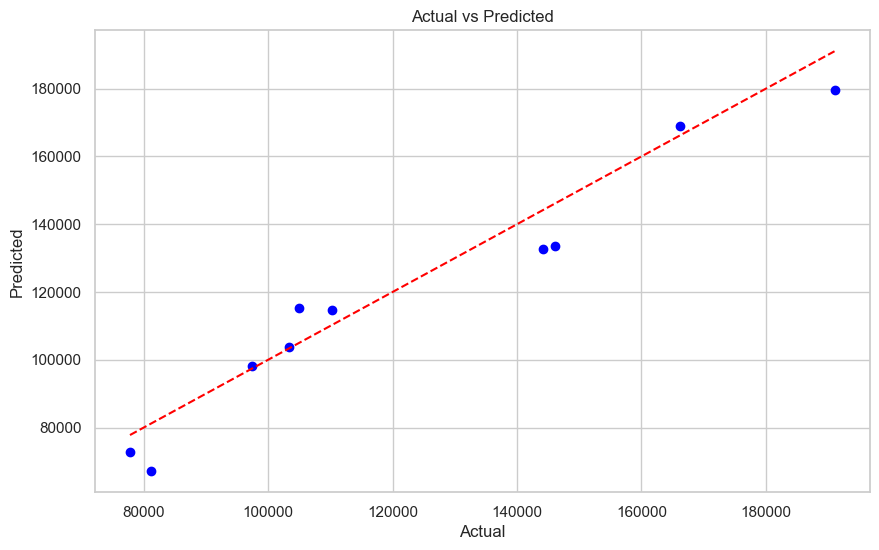

In [19]:
# Visualisasi regresi antara nilai aktual dan nilai prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

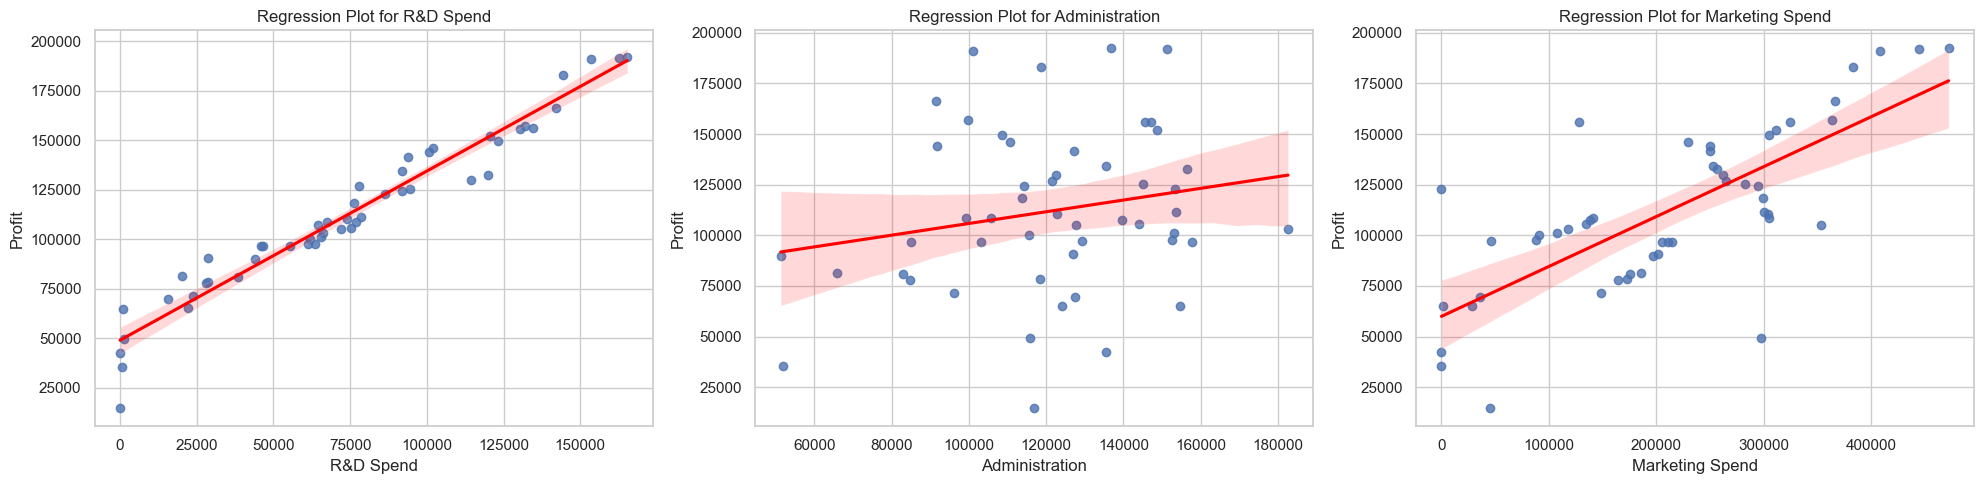

In [17]:
# Buat plot regresi untuk setiap variabel
sns.set(style="whitegrid")

# Mendefinisikan ukuran plot
plt.figure(figsize=(20, 5))

# Loop melalui setiap kolom variabel kecuali kolom target (Profit)
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(20, 3, i + 1)
    sns.regplot(x=df[column], y=df['Profit'], line_kws={"color": "red"})
    plt.title('Regression Plot for {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Profit')

plt.tight_layout()
plt.show()

### uji normalitas

In [18]:
# Hitung residu
residuals = y_test - y_pred

# Uji normalitas menggunakan Shapiro-Wilk test
stat, p_value = stats.shapiro(residuals)
print("Uji Shapiro-Wilk (H0: Residuals terdistribusi normal):")
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)
if p_value > 0.05:
    print("Tidak ada cukup bukti untuk menolak H0, Maka residuals berdistribusi normal")
else:
    print("Terdapat cukup bukti untuk menolak H0, Maka residuals tidak berdistribusi normal")

Uji Shapiro-Wilk (H0: Residuals terdistribusi normal):
Shapiro-Wilk Test Statistic: 0.911608099937439
p-value: 0.292220801115036
Tidak ada cukup bukti untuk menolak H0, Maka residuals berdistribusi normal
